<a href="https://colab.research.google.com/github/AnnaGass/DSA-SleepHealthData/blob/main/03_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# @title # Select the subject to be used { display-mode: "both" }
subject = '027'

# Install python libraries and load packages

In [5]:
# @title Install needed libraries { display-mode: "both" }
!pip install pandas
!pip install pandas scikit-learn

In [18]:
# @title Import libraries { display-mode: "both" }
import os
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [8]:
# @title Define constants { display-mode: "both" }
output_directory = "results/"

base_data = "./base_data.csv"

In [9]:
# @title Create output directory for subject { display-mode: "both" }

# Create folders if not exists
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

# Data Analysis

Accuracy: 0.7924211312301661
Classification Report:
              precision    recall  f1-score   support

       Apnea       0.42      0.16      0.23       496
   Hypoapnea       0.46      0.10      0.17       660
     Nothing       0.82      0.98      0.89      4201

    accuracy                           0.79      5357
   macro avg       0.57      0.41      0.43      5357
weighted avg       0.74      0.79      0.74      5357



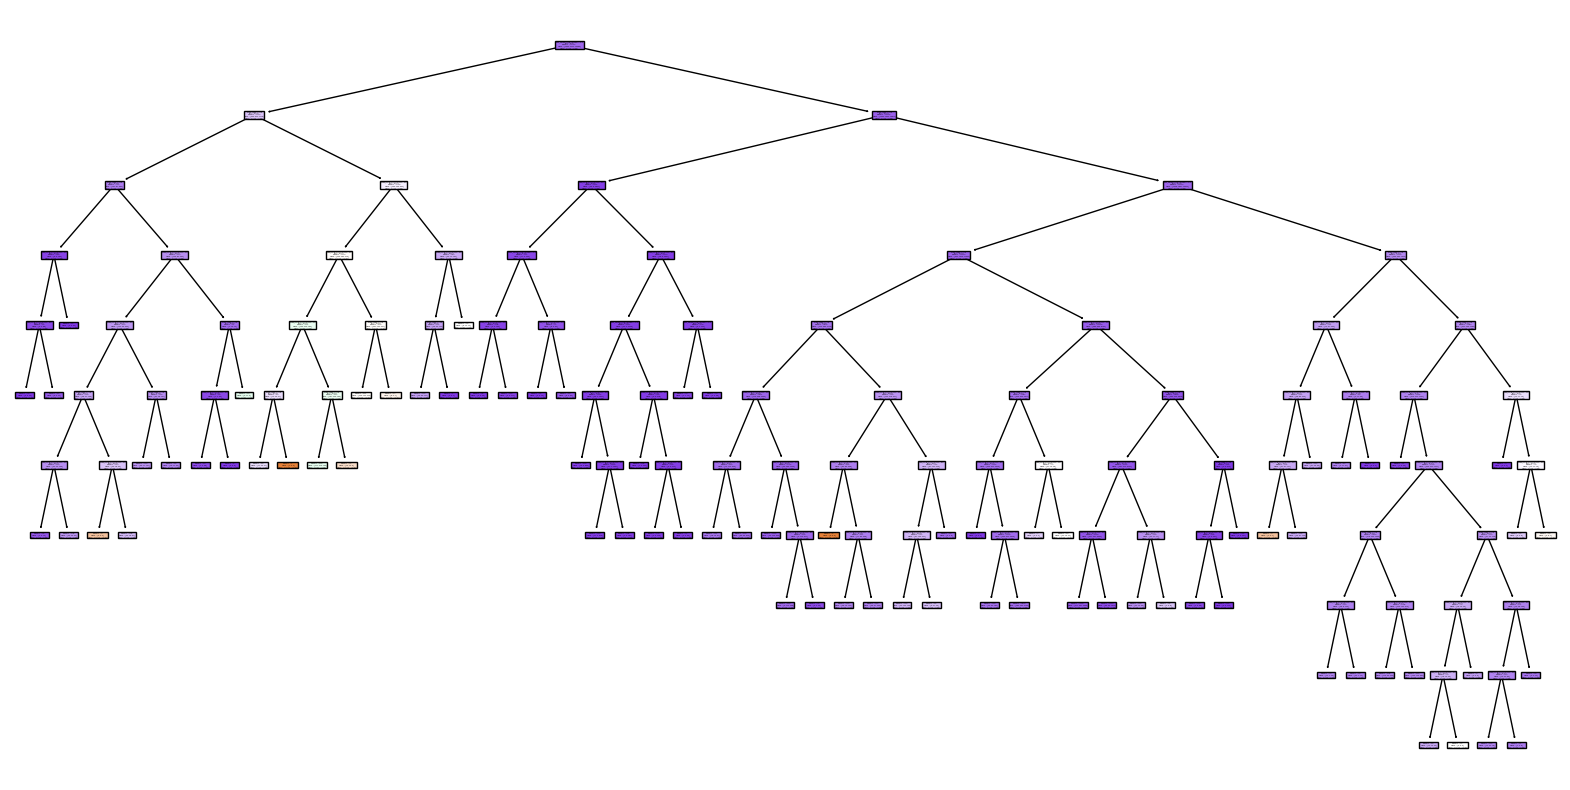

In [17]:
# @title Decision Tree with unchanged input data

# Set the output file and image path
output_file = output_directory + "decision_tree.txt"
output_image = output_directory + "decision_tree.png"

# Load the CSV file
df = pd.read_csv(base_data)

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical feature
df['SpO2_Category_Transformed'] = le.fit_transform(df['SpO2 Category'])
df['Pulse_Range_Transformed'] = le.fit_transform(df['Pulse Range'])

# Split the data into features and target
X = df[['SpO2_Category_Transformed', 'Pulse_Range_Transformed', 'Sleep Stage']]
y = df['Apnea']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Save the accuracy and classification report to a text file
with open(output_file, 'w') as f:
    f.write(f'Accuracy: {accuracy}\n')
    f.write('Classification Report:\n')
    f.write(classification_report_str)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.savefig(output_image)
plt.show()
plt.close()

**Interpretation**
- High Accuracy for "Nothing": The model performs well in detecting instances where there is "Nothing" (non-events), as indicated by high precision, recall, and F1-score. This class also has the highest number of instances, which influences the overall accuracy significantly.
- Low Performance for Apnea and Hypoapnea: The model struggles to correctly identify Apnea and Hypoapnea events, with low precision, recall, and F1-scores for both classes. This suggests that the model is less effective at distinguishing these events from each other and from non-events.
- Imbalanced Classes: The support values show a significant class imbalance, with many more instances of "Nothing" than Apnea and Hypoapnea. This imbalance can contribute to the model's poor performance on the less represented classes (Apnea and Hypoapnea).

Accuracy: 0.7923277954078776
Classification Report:
              precision    recall  f1-score   support

       Apnea       0.38      0.15      0.22       981
   Hypoapnea       0.45      0.11      0.18      1296
     Nothing       0.82      0.97      0.89      8437

    accuracy                           0.79     10714
   macro avg       0.55      0.41      0.43     10714
weighted avg       0.73      0.79      0.74     10714



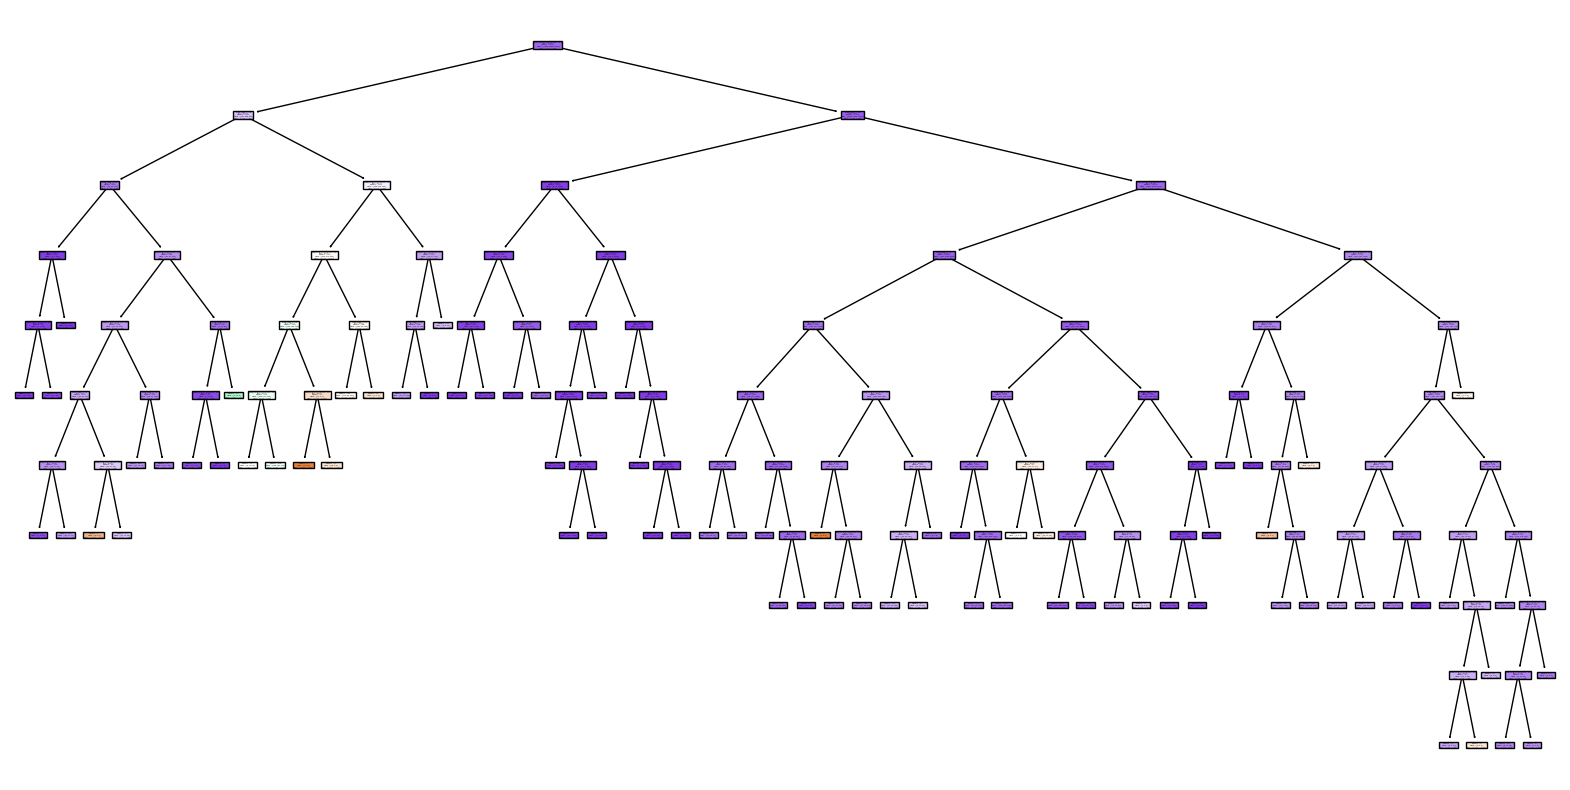

In [20]:
# @title Decision Tree with unchanged input data

# Set the output file and image path
output_file = output_directory + "more_tests_decision_tree.txt"
output_image = output_directory + "more_tests_decision_tree.png"

# Load the CSV file
df = pd.read_csv(base_data)

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical feature
df['SpO2_Category_Transformed'] = le.fit_transform(df['SpO2 Category'])
df['Pulse_Range_Transformed'] = le.fit_transform(df['Pulse Range'])

# Split the data into features and target
X = df[['SpO2_Category_Transformed', 'Pulse_Range_Transformed', 'Sleep Stage']]
y = df['Apnea']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Save the accuracy and classification report to a text file
with open(output_file, 'w') as f:
    f.write(f'Accuracy: {accuracy}\n')
    f.write('Classification Report:\n')
    f.write(classification_report_str)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.savefig(output_image)
plt.show()
plt.close()

The updated results after changing the test size to 0.4 and using the original dataset show a similar pattern to the initial results, but with a larger test set. The may issue to adress here is the imbalace.

Accuracy: 0.5180722891566265
Classification Report:
              precision    recall  f1-score   support

       Apnea       0.56      0.42      0.48       520
   Hypoapnea       0.45      0.60      0.51       478
     Nothing       0.58      0.54      0.56       496

    accuracy                           0.52      1494
   macro avg       0.53      0.52      0.52      1494
weighted avg       0.53      0.52      0.52      1494



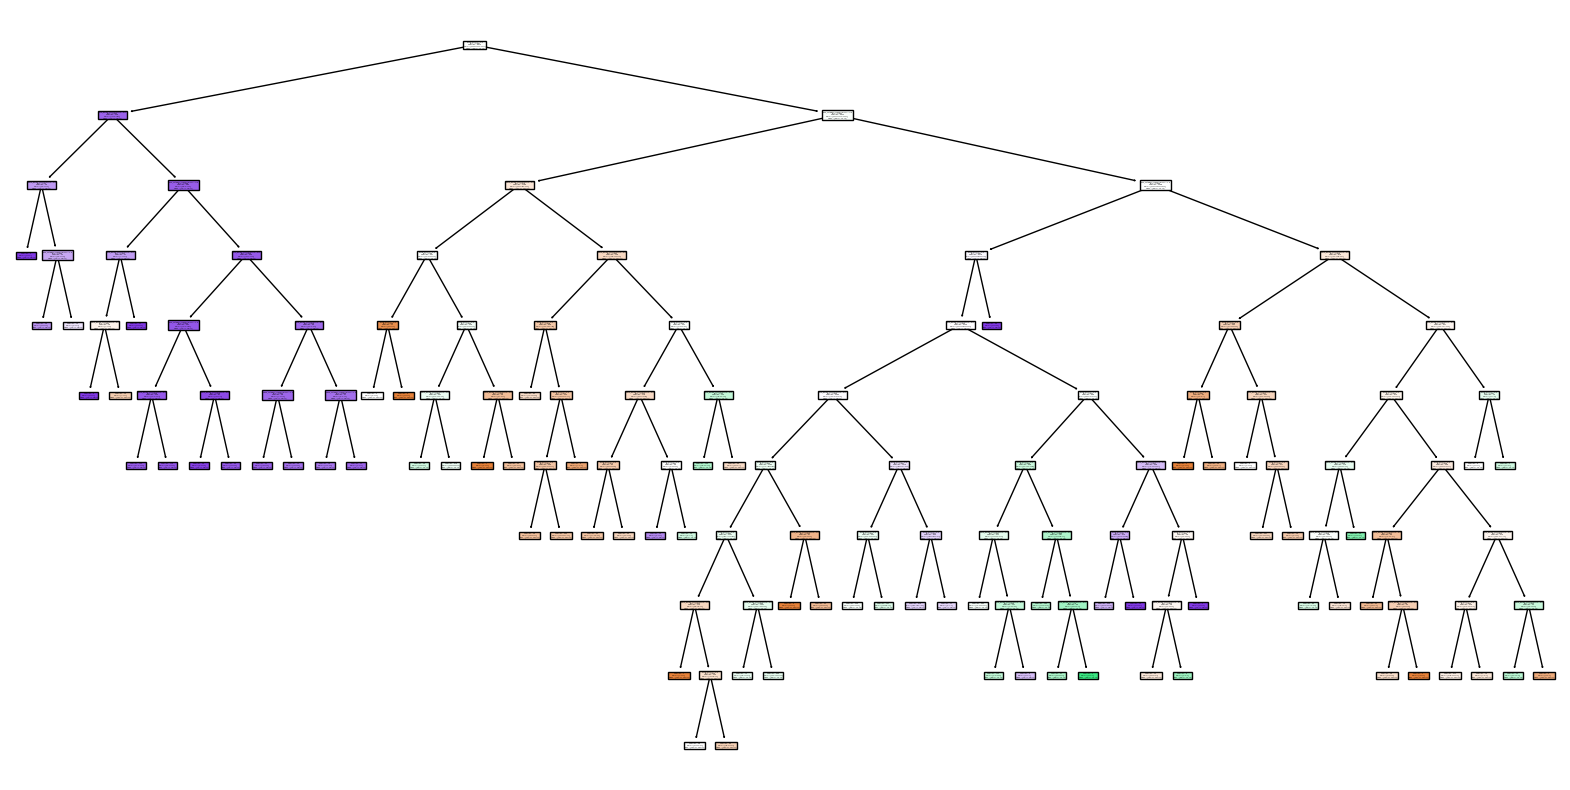

In [19]:
# @title Decision Tree with undersampling for nothing cases

# Load the CSV file
df = pd.read_csv(base_data)

# Set the output file and image path
output_file = output_directory + "undersampled_decision_tree.txt"
output_image = output_directory + "undersamplet_decision_tree.png"

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical feature
df['SpO2_Category_Transformed'] = le.fit_transform(df['SpO2 Category'])
df['Pulse_Range_Transformed'] = le.fit_transform(df['Pulse Range'])

# Split the data into features and target
X = df[['SpO2_Category_Transformed', 'Pulse_Range_Transformed', 'Sleep Stage']]
y = df['Apnea']

# Apply undersampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Save the accuracy and classification report to a text file
with open(output_file, 'w') as f:
    f.write(f'Accuracy: {accuracy}\n')
    f.write('Classification Report:\n')
    f.write(classification_report_str)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.savefig(output_image)
plt.show()
plt.close()


**Interpretation**
- Improved Balance: The metrics for Apnea and Hypoapnea have improved compared to the initial results. This indicates that the model is now better at identifying these classes, albeit with a trade-off in the overall accuracy.
- Balanced Performance: The performance across all three classes is more balanced, with precision, recall, and F1-scores being closer to each other.
- Recall for Hypoapnea: The model shows relatively good recall for Hypoapnea (0.60), meaning it correctly identifies 60% of Hypoapnea instances.